# Regressió polinòmica - Exemple Pressió by Temperatura
--------------------

En aquest exemple mirarem d'utilitzar una regressió polinòmica per explicar o obtenir el valor de la pressió a partir de la temperatura. 

In [1]:
# Importem les llibreries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## 0. Anàlisi exploratori de dades

In [4]:
# Importar el data set
dades = pd.read_csv('dataset/data-temperatues-pressions.csv')
dades

,Temperatura,Pressio
0,0,0.0002
1,20,0.0012
2,40,0.0060
3,60,0.0300
4,80,0.0900
5,100,0.2700


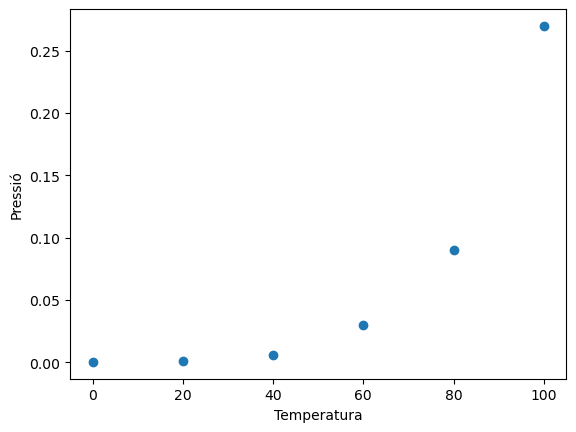

In [17]:
x = dades['Temperatura']
y = dades['Pressio']

plt.scatter(x, y)
plt.xlabel('Temperatura')
plt.ylabel('Pressió')
plt.show()

##  1. Regressió lineal simple

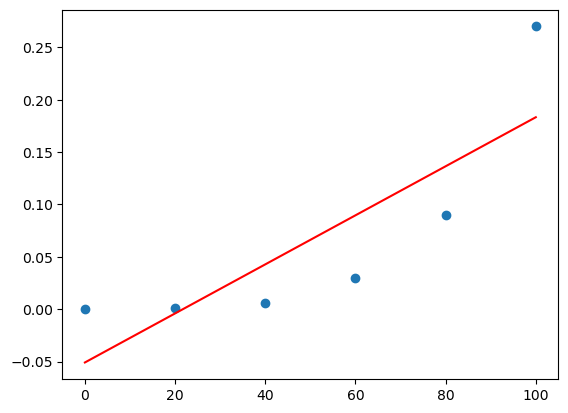

In [16]:
from sklearn.linear_model import LinearRegression

# Creem una regressió lineal simple
lr = LinearRegression()
x_train = dades.iloc[:]['Temperatura'].values.reshape(-1,1)
y_train = dades.iloc[:]['Pressio'].values.reshape(-1,1)
lr.fit(x_train, y_train)


plt.scatter(x, y)
plt.plot(x, lr.predict(x_train), color = 'red')
plt.show()

## 2. Regressió polinòmica - grau 2

In [41]:
from sklearn.preprocessing import PolynomialFeatures

# Creem un polinòmi de grau 2 per la variable X
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html    
poly_model2 = PolynomialFeatures(degree = 2)

# Fem un fit i tranforma a la vegada
# El fit entrena el model i el transform prepara les variables X amb tots els graus.
x_train_poly2 = poly_model.fit_transform(x_train)
x_train_poly2
#### Matriu x_train_poly x^0, X, x^2
#1    0     0  
#1    2     4
#1    4    16
#1    6    36
#1    8    64
#1   10   100

array([[1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 2.00e+01, 4.00e+02, 8.00e+03],
       [1.00e+00, 4.00e+01, 1.60e+03, 6.40e+04],
       [1.00e+00, 6.00e+01, 3.60e+03, 2.16e+05],
       [1.00e+00, 8.00e+01, 6.40e+03, 5.12e+05],
       [1.00e+00, 1.00e+02, 1.00e+04, 1.00e+06]])

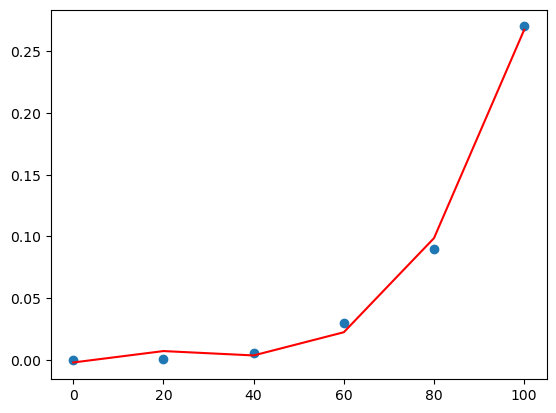

In [42]:
# Construim el model de regressió
poly_reg2 = LinearRegression()

poly_reg2.fit(x_train_poly, y_train)

plt.scatter(x, y)
plt.plot(x, poly_reg2.predict(x_train_poly2), color = 'red')
plt.show()

## 2. Regressió polinòmica - grau 3

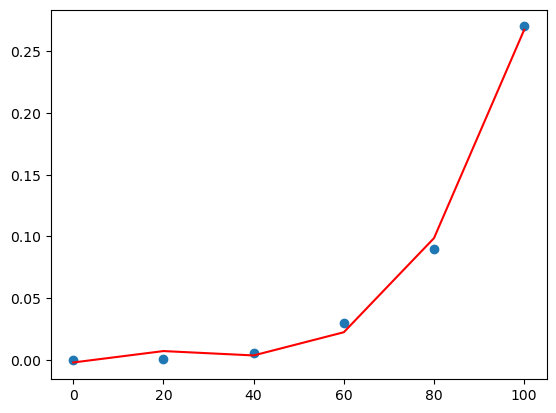

In [45]:
from sklearn.preprocessing import PolynomialFeatures

poly_model3 = PolynomialFeatures(degree = 3)

# Fem un fit i tranforma a la vegada
# El fit entrena el model i el transform prepara les variables X amb tots els graus.
x_train_poly3 = poly_model3.fit_transform(x_train)

poly_reg3 = LinearRegression()

poly_reg3.fit(x_train_poly3, y_train)

plt.scatter(x, y)
plt.plot(x, poly_reg3.predict(x_train_poly3), color = 'red')
plt.show()

## 2. Regressió polinòmica - grau 4

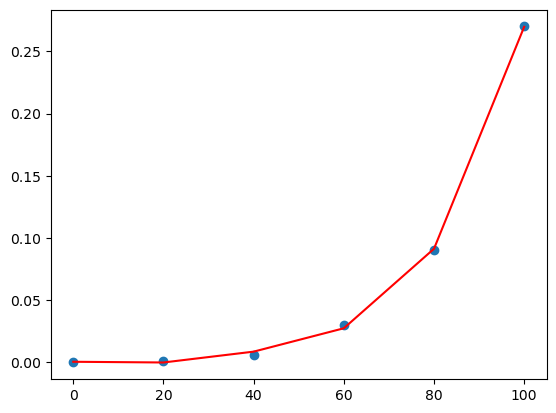

In [47]:
from sklearn.preprocessing import PolynomialFeatures

poly_model4 = PolynomialFeatures(degree = 4)

# Fem un fit i tranforma a la vegada
# El fit entrena el model i el transform prepara les variables X amb tots els graus.
x_train_poly4 = poly_model4.fit_transform(x_train)

poly_reg4 = LinearRegression()

poly_reg4.fit(x_train_poly4, y_train)

plt.scatter(x, y)
plt.plot(x, poly_reg4.predict(x_train_poly4), color = 'red')
plt.show()

## 3. Evaluació dels model obtinguts

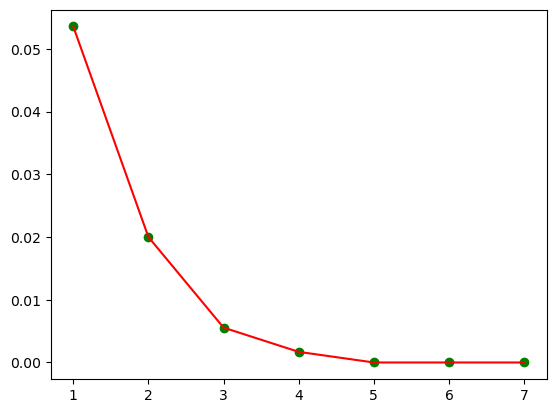

In [49]:
from sklearn.metrics import mean_squared_error

x_values = x_train
y_values = y_train
number_degrees = [1,2,3,4,5,6,7]
plt_mean_squared_error = []
for degree in number_degrees:

   poly_model = PolynomialFeatures(degree=degree)
  
   poly_x_values = poly_model.fit_transform(x_values)
   poly_model.fit(poly_x_values, y_values)
  
   regression_model = LinearRegression()
   regression_model.fit(poly_x_values, y_values)
   y_pred = regression_model.predict(poly_x_values)
  
   plt_mean_squared_error.append(mean_squared_error(y_values, y_pred, squared=False))
  
plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red") 

In [50]:
plt_mean_squared_error

[0.05357487802651123,
 0.020000258331664945,
 0.005556544356448999,
 0.001692193404584276,
 2.629412662660634e-10,
 1.4373741231597422e-13,
 2.9287295720799036e-14]

Mirant el valor dels Error quadràtics mitjos (MSE) veiem que a partir de grau 2 ens podem trobar amb un overfitting